# Linear Regression

### Generating Random data on line


y=-5.09-15.51*x


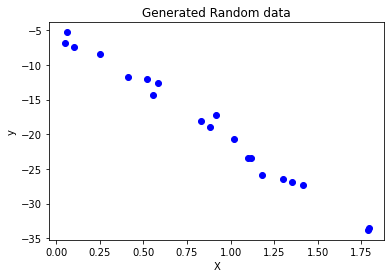

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
X = 2 * np.random.rand(20, 1)
a=5*np.random.randn()-10
b=5*np.random.randn()-10

y = a + b * X + np.random.randn(20, 1)
print('y={:+0.2f}{:+0.2f}*x'.format(a,b))
plt.scatter(X, y, color='blue') 
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Generated Random data') 
plt.show()

### training

#### initialize parameters

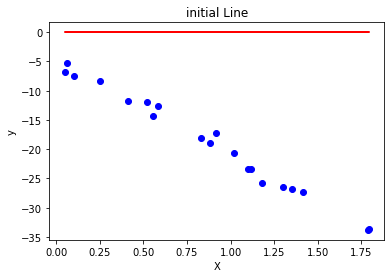

In [45]:
theta0 = 0
theta1 = 0
learning_rate = 0.1
iterations = 200
#---------------------------------------------plot the beginning line:
plt.scatter(X, y, color='blue') 
plt.plot(X, theta0 + theta1*X, color='red') 
plt.xlabel('X') 
plt.ylabel('y')
plt.title('initial Line')
plt.show()

#### simple widget to animate the line

Iteration= 0 a:-5.09,b:-15.51,Theta0: 0.00, Theta1: 0.00


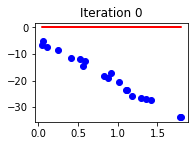

Iteration= 50 a:-5.09,b:-15.51,Theta0: -7.47, Theta1: -13.51


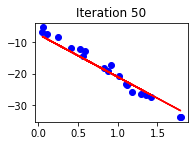

Iteration= 100 a:-5.09,b:-15.51,Theta0: -6.04, Theta1: -14.94


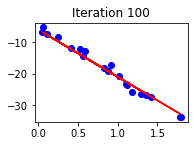

Iteration= 150 a:-5.09,b:-15.51,Theta0: -5.35, Theta1: -15.62


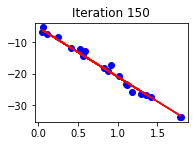

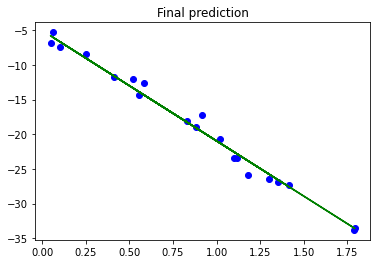

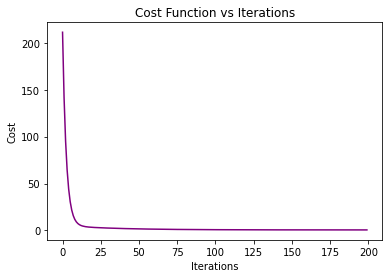

Iteration= 199 a:-5.09,b:-15.51,Theta0: -5.02, Theta1: -15.94


In [47]:
costs = [] 
theta0 = 0
theta1 = 0
for i in range(iterations):
    y_pred = theta0 + theta1 * X

    #plot if 1/4 of iterations passed----------
    if i % (iterations // 4) == 0:
        print('Iteration=',i, 'a:{:0.2f},b:{:0.2f},Theta0: {:0.2f}, Theta1: {:0.2f}'.format(a,b,theta0, theta1))
        plt.subplot(2, 2, i // (iterations // 4) + 1)
        plt.scatter(X, y, color='blue')
        plt.plot(X, y_pred, color='red')
        plt.title(f"Iteration {i}")
        plt.show()
    
    grad_theta0 = np.mean(y_pred - y)
    grad_theta1 = np.mean((y_pred - y) * X)
    theta0 -= learning_rate * grad_theta0
    theta1 -= learning_rate * grad_theta1

    cost = np.mean((y_pred - y) ** 2) / 2
    costs.append(cost)


plt.scatter(X, y, color='blue')
plt.plot(X, theta0 + theta1 * X, color='green')
plt.title("Final prediction")
plt.show()

plt.plot(range(iterations), costs, color='purple') 
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.show()

print('Iteration=',i, 'a:{:0.2f},b:{:0.2f},Theta0: {:0.2f}, Theta1: {:0.2f}'.format(a,b,theta0, theta1))

#print('Prediction after iterations: Theta0: {:0.3f}, Theta1: {:0.3f}'.format(theta0, theta1))

# Polynomial Regression

### Generating Random data on curve 


y=-4.33-15.50*x-10.86*x^2


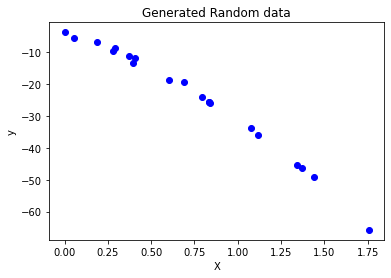

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1)
X = 2 * np.random.rand(20, 1)
a=5*np.random.randn()-10
b=5*np.random.randn()-10
c=5*np.random.randn()-10
y = a + b * X + c * X ** 2 +np.random.randn(20, 1)
print('y={:+0.2f}{:+0.2f}*x{:+0.2f}*x^2'.format(a,b,c))
plt.scatter(X, y, color='blue') 
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Generated Random data') 
plt.show()

### initialize parameters and adding quadratic features to X

In [65]:

# you can set degree of polynomial from 1-5 with 0.01 learning rate with increased degree you should lower learning rate
learning_rate = 0.01
iterations = 400

degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly_features.fit_transform(X)
print(np.shape(X))
print(np.shape(X_poly))
print(X[0])
print(X_poly[0])

theta = np.random.randn(degree + 1, 1)
print(np.shape(theta))

(20, 1)
(20, 3)
[0.83404401]
[1.         0.83404401 0.69562941]
(3, 1)


### training

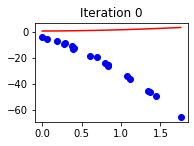

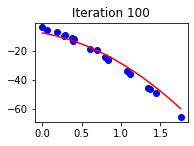

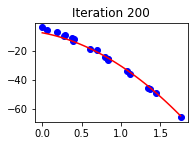

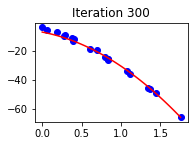

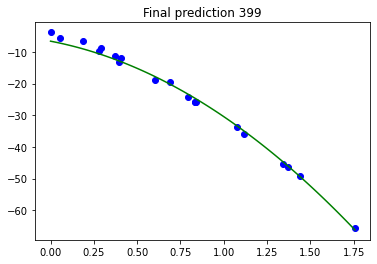

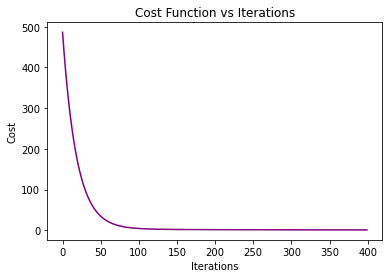

In [66]:

costs = [] 

for i in range(iterations):
    y_pred = X_poly.dot(theta)
    
    #plot if 1/4 of iterations passed----------
    if i % (iterations // 4) == 0:
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_plot_poly = poly_features.transform(X_plot)
        y_pred_plot = X_plot_poly.dot(theta)
        plt.subplot(2, 2, i // (iterations // 4) + 1)
        plt.scatter(X, y, color='blue')
        plt.plot(X_plot, y_pred_plot, color='red')
        plt.title(f"Iteration {i}")
        plt.show()
    
    grad_theta = (1/len(y)) * X_poly.T.dot(y_pred - y)
    theta -= learning_rate * grad_theta
    
    cost = np.mean((y_pred - y) ** 2) / 2
    costs.append(cost)


X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_pred_plot = X_plot_poly.dot(theta)
plt.scatter(X, y, color='blue')
plt.plot(X_plot, y_pred_plot, color='green')
plt.title(f"Final prediction {i}")
plt.show()

plt.plot(range(iterations), costs, color='purple') 
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.show()




